In [1]:
import re
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
#load mbti dataset 
mbti_dataset = pd.read_csv("mbti_1.csv",encoding='ISO-8859-1')

#load big5 dataset
big5_dataset = pd.read_csv("big5_1.csv",encoding='ISO-8859-1')

In [3]:
#DATASET EXPLORATION

In [4]:
#MBTI DATASET
mbti_dataset.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [5]:
#renaming the column names into meaningful names
new_column_names = {'type':'MBTI','posts':'TEXT'}

# Use the rename method to rename columns
mbti_dataset = mbti_dataset.rename(columns=new_column_names)


In [6]:
mbti_dataset = mbti_dataset.iloc[:,[1,0]]

In [7]:
mbti_dataset.groupby(['MBTI']).count()


,TEXT
MBTI,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [8]:
mbti_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEXT    8675 non-null   object
 1   MBTI    8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [9]:
mbti_dataset.describe()

,TEXT,MBTI
count,8675,8675
unique,8675,16
top,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,INFP
freq,1,1832


In [10]:
#BIG5 DATASET
big5_dataset.head(10)

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y
5,1997_722902.txt,Today. Had to turn the music down. Today I wen...,y,n,y,n,y
6,1997_724708.txt,Stream of consciousness. What should I write a...,n,n,y,n,n
7,1997_724794.txt,The RTF305 Usenet site is a piece of garbage! ...,n,n,n,y,y
8,1997_628043.txt,I'm really unsure about this assignment becaus...,y,y,n,y,y
9,1997_708036.txt,Today was a tough day for me. I can't believed...,y,y,y,y,n


In [11]:
# Selecting the required columns from the dataset
columns_to_keep = ['TEXT', 'cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']
big5_dataset = big5_dataset[columns_to_keep]


In [12]:
big5_dataset.head(10)

,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,I can't believe it! It's really happening! M...,y,n,y,y,n
4,"Well, here I go with the good old stream of co...",y,n,y,n,y
5,Today. Had to turn the music down. Today I wen...,y,n,y,n,y
6,Stream of consciousness. What should I write a...,n,n,y,n,n
7,The RTF305 Usenet site is a piece of garbage! ...,n,n,n,y,y
8,I'm really unsure about this assignment becaus...,y,y,n,y,y
9,Today was a tough day for me. I can't believed...,y,y,y,y,n


In [13]:
#renaming the column names into meaningful names
new_column_names = {'cEXT': 'EXTRAVERSION', 'cNEU': 'NEUROTICISM', 'cAGR': 'AGREEABLENESS', 'cCON': 'CONSCIENTIOUSNESS', 'cOPN': 'OPENNESS'}

# Use the rename method to rename columns
big5_dataset = big5_dataset.rename(columns=new_column_names)

In [14]:
big5_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TEXT               2468 non-null   object
 1   EXTRAVERSION       2468 non-null   object
 2   NEUROTICISM        2468 non-null   object
 3   AGREEABLENESS      2468 non-null   object
 4   CONSCIENTIOUSNESS  2468 non-null   object
 5   OPENNESS           2468 non-null   object
dtypes: object(6)
memory usage: 115.8+ KB


In [15]:
print(mbti_dataset)

                                                   TEXT  MBTI
0     'http://www.youtube.com/watch?v=qsXHcwe3krw|||...  INFJ
1     'I'm finding the lack of me in these posts ver...  ENTP
2     'Good one  _____   https://www.youtube.com/wat...  INTP
3     'Dear INTP,   I enjoyed our conversation the o...  INTJ
4     'You're fired.|||That's another silly misconce...  ENTJ
...                                                 ...   ...
8670  'https://www.youtube.com/watch?v=t8edHB_h908||...  ISFP
8671  'So...if this thread already exists someplace ...  ENFP
8672  'So many questions when i do these things.  I ...  INTP
8673  'I am very conflicted right now when it comes ...  INFP
8674  'It has been too long since I have been on per...  INFP

[8675 rows x 2 columns]


In [16]:
#CONVERTING BIG5 TO MBTI

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk import word_tokenize
import string
punctuations = string.punctuation

import nltk
nltk.download('omw-1.4')


from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def normalization(post_str: str, vocab=None):
    # Lowercase
    post_str = post_str.lower()

    # Removing Punctuation
    post_str = "".join([char for char in post_str if char not in punctuations])

    # Tokenization
    words: list = word_tokenize(post_str)

    # Stopword Filtering
    filtered_words = [word for word in words if word not in stop_words]

    # Remove words not in the vocabulary
    if vocab is not None:
        filtered_words = [word for word in filtered_words if word in vocab]
        pass

    # Lemmatization
    lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
    return lem_words

    pass

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:

def bigfive_to_mbti():
    final_dataset = mbti_dataset
    
    list_text = list()
    list_type = list()
    Data_type = object
    
    for text in final_dataset['TEXT']:
        text_stringlist = (normalization(text))
        
        list_text.append(text_stringlist)
        
    for type in final_dataset["MBTI"]:
        list_type.append(type)  

    
    for personality in big5_dataset.itertuples(index=False):
        mbti = ''
        #converting Extroversion to Introvert/Extrovert
        if(personality[1].lower() == 'y'):
            mbti+= 'E'
        else:
            mbti+= 'I'
        
        #converting Openness to Intuition/Sensing
        if(personality[5].lower() == 'y'):
            mbti+= 'N'
        else:
            mbti+= 'S'
        
        #converting Agreeableness to Thinker/Feeler
        if(personality[3].lower() == 'y'):
            mbti+= 'F'
        else:
            mbti+= 'T'
        
        #converting Conscientiousness to judger/Perceiver
        if(personality[4].lower() == 'y'):
            mbti+= 'J'
        else:
            mbti+= 'P'
            
        new_row = pd.DataFrame({'TEXT': [personality[0]], 'MBTI': [mbti]})

        
        final_dataset = pd.concat([final_dataset, new_row], ignore_index=True)
        
    
    return final_dataset,list_text,list_type

In [20]:
final_dataset,list_text,list_type = bigfive_to_mbti()
print(len(list_text))

8675


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

def train_test_div():
    
    # Joining tokenized words into sentences
    joined_text = [' '.join(words) for words in list_text]

    # Using CountVectorizer
    vectorizer = CountVectorizer(max_features=1000)
    x = vectorizer.fit_transform(joined_text)  # Sparse matrix representation


    y = list_type

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
    return x_train, x_test, y_train, y_test

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

def train_test_div2():
    
    # Joining tokenized words into sentences
    joined_text = [' '.join(words) for words in list_text]

    # Using TfidfVectorizer without max_features
    vectorizer = TfidfVectorizer(max_features=5000)
    x = vectorizer.fit_transform(joined_text)  # Sparse matrix representation of TF-IDF values

    y = list_type

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
    return x_train, x_test, y_train, y_test


In [23]:
x_train, x_test, y_train, y_test = train_test_div()

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

def multinomialNB(x_train, x_test, y_train, y_test):
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    y_pred_multi = model.predict(x_test)

    #print(y_pred_multi)
    accuracy_mnb = accuracy_score(y_test, y_pred_multi)*100

    print("The accuracy of Multinomial Naive Bayes: ",accuracy_score(y_test, y_pred_multi)*100,"% \n")

    print("total count of each type in the test data" )
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)),"\n")

    print("total count of each type in predicted data ")
    unique, counts = np.unique(y_pred_multi, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_mnb


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

def complementNB(x_train, x_test, y_train, y_test):

    x_train_dense = x_train.toarray()
    x_test_dense = x_test.toarray()

    model = ComplementNB()
    model.fit(x_train_dense, y_train)
    y_pred_multi = model.predict(x_test_dense)
    #print(y_pred_multi)
    
    accuracy_cnb = accuracy_score(y_test, y_pred_multi)*100
    print("The accuracy of Complement Naive Bayes: ",accuracy_score(y_test, y_pred_multi)*100,"% \n")


    print("total count of each type in the test data" )
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)),"\n")

    print("total count of each type in predicted data ")
    unique, counts = np.unique(y_pred_multi, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_cnb,model

In [26]:
    
def logisticRegression(x_train, x_test, y_train, y_test):
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=500)
    logreg.fit(x_train, y_train)

    y_pred = logreg.predict(x_test)

    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

    print("The accuracy of Logistic regression: ",accuracy_score(y_test, y_pred)*100,"% \n")
    print( df)


    accuracy_lr = accuracy_score(y_test, y_pred)*100
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy_lr)
    print("Confusion matrix:", confusion_mat)

    #labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    #ax = sns.heatmap(ConfusionMatrix, annot=True, cmap=’BuPu’)
    print("total count of each type in the test data" )
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)),"\n")

    print("total count of each type in predicted data ")
    unique, counts = np.unique(y_pred, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_lr
    

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import os
from typing import Optional

def gradientBoosting(x_train, x_test, y_train, y_test):
    
    gbc_model_dump_file = 'gbc2.model'
    gbc: Optional[GradientBoostingClassifier] = None
    if os.path.exists(gbc_model_dump_file):
        gbc = joblib.load(gbc_model_dump_file)
        pass
    else:
        gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                         max_depth=1, random_state=42)
        gbc.fit(x_train, y_train)
        pass


    y_pred_gbc = gbc.predict(x_test)
    accuracy_gbc = accuracy_score(y_test, y_pred_gbc)*100

    print("The accuracy of Gradient Boosting: ",accuracy_score(y_test, y_pred_gbc)*100,"% \n")


    print("total count of each type in the test data" )
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)),"\n")

    print("total count of each type in predicted data ")
    unique, counts = np.unique(y_pred_gbc, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_gbc,gbc

In [28]:
#knearest neighbors
from sklearn.neighbors import KNeighborsClassifier

def knearestNeighbors(x_train, x_test, y_train, y_test):
    
    neigh = KNeighborsClassifier(n_neighbors=5, n_jobs=3)
    neigh.fit(x_train, y_train)
    y_pred_knnbrs = neigh.predict(x_test)
    
    accuracy_knnnbrs = accuracy_score(y_test, y_pred_knnbrs)*100
    print("The accuracy of Knearest neigbors: ",accuracy_score(y_test, y_pred_knnbrs)*100,"% \n")


    print("total count of each type in the test data" )
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)),"\n")

    print("total count of each type in predicted data ")
    unique, counts = np.unique(y_pred_knnbrs, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_knnnbrs

In [29]:
from sklearn.ensemble import RandomForestClassifier

def randomForest(x_train, x_test, y_train, y_test):
    
    # Create a Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=5)

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict on the test data
    y_pred_rf = model.predict(x_test)

    accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
    # Print accuracy
    print("The accuracy of Random Forest: ", accuracy_score(y_test, y_pred_rf) * 100, "% \n")

    # Print the total count of each type in the test data
    print("Total count of each type in the test data")
    unique, counts = np.unique(y_test, return_counts=True)
    print(dict(zip(unique, counts)), "\n")

    # Print the total count of each type in predicted data
    print("Total count of each type in predicted data")
    unique, counts = np.unique(y_pred_rf, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return accuracy_rf


In [30]:
#comparing the accuracies of all the models
accuracy_mnb = multinomialNB(x_train, x_test, y_train, y_test)

The accuracy of Multinomial Naive Bayes:  57.46397694524495 % 

total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

total count of each type in predicted data 
{'ENFJ': 39, 'ENFP': 145, 'ENTJ': 83, 'ENTP': 103, 'ESFJ': 11, 'ESFP': 13, 'ESTJ': 2, 'ESTP': 29, 'INFJ': 215, 'INFP': 420, 'INTJ': 196, 'INTP': 248, 'ISFJ': 31, 'ISFP': 59, 'ISTJ': 42, 'ISTP': 99}


In [31]:
accuracy_cnb,cnb_model = complementNB(x_train, x_test, y_train, y_test)

The accuracy of Complement Naive Bayes:  62.132564841498564 % 

total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

total count of each type in predicted data 
{'ENFJ': 13, 'ENFP': 130, 'ENTJ': 21, 'ENTP': 116, 'ESFJ': 2, 'ESTP': 2, 'INFJ': 257, 'INFP': 549, 'INTJ': 213, 'INTP': 324, 'ISFJ': 12, 'ISFP': 12, 'ISTJ': 22, 'ISTP': 62}


C:\Users\saisu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of Logistic regression:  49.79827089337176 % 

     Real Values Predicted Values
0           INFP             ENTJ
1           INTP             INTP
2           INFP             INTP
3           ENFP             ENFP
4           ENTP             ENTP
...          ...              ...
1730        INTP             INTP
1731        INFJ             INFJ
1732        INTP             INTJ
1733        INTJ             INTJ
1734        ENTJ             ENTJ

[1735 rows x 2 columns]
Accuracy: 49.79827089337176
Confusion matrix: [[ 13   2   0   0   0   0   0   0   6   7   1   1   0   2   0   1]
 [  5  79   1   8   0   0   0   2   8  17   4   4   2   7   3   2]
 [  0   0  13   5   0   1   0   0   4   5   2   5   0   1   0   1]
 [  0  16   3  61   0   0   0   2  17   6   9  14   0   2   1   7]
 [  0   0   0   0   4   0   0   0   1   1   0   4   0   1   0   0]
 [  0   1   2   0   0   3   0   0   1   1   0   1   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   1   1   0   0   1  

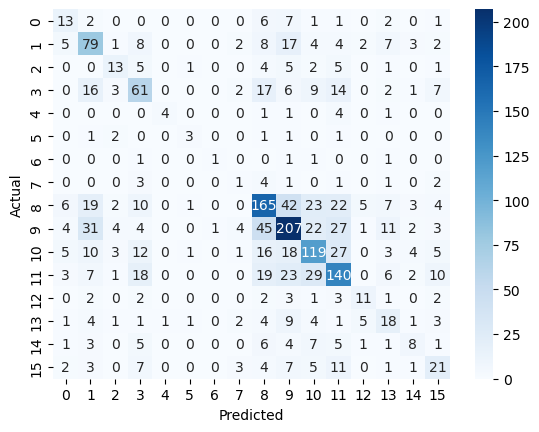

total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

total count of each type in predicted data 
{'ENFJ': 40, 'ENFP': 177, 'ENTJ': 30, 'ENTP': 137, 'ESFJ': 5, 'ESFP': 7, 'ESTJ': 2, 'ESTP': 15, 'INFJ': 302, 'INFP': 352, 'INTJ': 227, 'INTP': 266, 'ISFJ': 25, 'ISFP': 63, 'ISTJ': 25, 'ISTP': 62}


In [32]:
accuracy_lr = logisticRegression(x_train, x_test, y_train, y_test)

In [33]:
accuracy_gbc,gbc_model = gradientBoosting(x_train, x_test, y_train, y_test)

The accuracy of Gradient Boosting:  60.576368876080686 % 

total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

total count of each type in predicted data 
{'ENFJ': 31, 'ENFP': 125, 'ENTJ': 17, 'ENTP': 122, 'ESFJ': 17, 'ESFP': 6, 'ESTP': 28, 'INFJ': 294, 'INFP': 497, 'INTJ': 200, 'INTP': 256, 'ISFJ': 32, 'ISFP': 27, 'ISTJ': 46, 'ISTP': 37}


In [34]:
accuracy_knnbrs = knearestNeighbors(x_train, x_test, y_train, y_test)

The accuracy of Knearest neigbors:  28.12680115273775 % 

total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

total count of each type in predicted data 
{'ENFJ': 48, 'ENFP': 196, 'ENTJ': 40, 'ENTP': 195, 'ESFJ': 10, 'ESFP': 11, 'ESTP': 23, 'INFJ': 307, 'INFP': 468, 'INTJ': 149, 'INTP': 211, 'ISFJ': 2, 'ISFP': 36, 'ISTJ': 11, 'ISTP': 28}


In [35]:
accuracy_rf = randomForest(x_train, x_test, y_train, y_test)

The accuracy of Random Forest:  58.61671469740634 % 

Total count of each type in the test data
{'ENFJ': 33, 'ENFP': 142, 'ENTJ': 37, 'ENTP': 138, 'ESFJ': 11, 'ESFP': 9, 'ESTJ': 5, 'ESTP': 13, 'INFJ': 309, 'INFP': 366, 'INTJ': 224, 'INTP': 258, 'ISFJ': 27, 'ISFP': 56, 'ISTJ': 42, 'ISTP': 65} 

Total count of each type in predicted data
{'ENFJ': 3, 'ENFP': 91, 'ENTJ': 2, 'ENTP': 84, 'INFJ': 373, 'INFP': 626, 'INTJ': 200, 'INTP': 322, 'ISFJ': 1, 'ISFP': 1, 'ISTJ': 3, 'ISTP': 29}


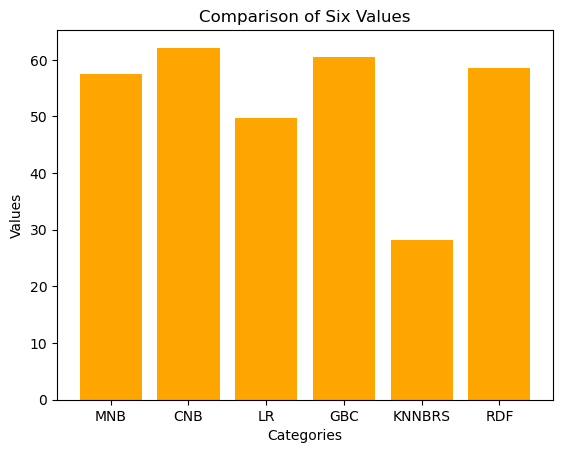

In [36]:

import matplotlib.pyplot as plt

# This line is for Jupyter notebooks to display the plot inline
%matplotlib inline

# Sample data
values = [accuracy_mnb, accuracy_cnb, accuracy_lr, accuracy_gbc,accuracy_knnbrs , accuracy_rf]
labels = ['MNB', 'CNB', 'LR', 'GBC', 'KNNBRS', 'RDF']

# Creating the bar plot
plt.bar(labels, values, color = 'orange')

# Adding titles and labels
plt.title('Comparison of Six Values')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the plot
plt.show()


In [37]:
#Since Complement Naive Bayes has the best accuracy, we will use this is in personality predictions of the people

In [38]:
#Finding the type of each applicant in the test data

In [46]:
import csv

# Replace 'your_file.csv' with the path to your CSV file
file_path = test_file = 'Test_data_main.csv'

vectorizer = CountVectorizer(max_features=1000)
joined_text = [' '.join(words) for words in list_text]
vectorizer.fit(joined_text)

# Open the CSV file
with open(file_path, newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    
    final_list=[]
    # Loop through each row in the CSV file
    next(csvreader)
    for row in csvreader:
        # Accessing each column in the row
        final_desc = ''
        final_desc = row[2]+' '+row[4]+' '+row[5]+' '+row[6]+' '+row[7]
        testdata_list = normalization(final_desc)
        final_list.append(testdata_list)
        
        
    final = [' '.join(words) for words in final_list]    
    x = vectorizer.transform(final)     
        
    ans = cnb_model.predict(x)
    print(ans)
    unique1, counts1 = np.unique(ans, return_counts=True)
    print(dict(zip(unique1, counts1)), "\n")

    
        
        


['INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTP' 'INTJ' 'ENFJ' 'INTJ' 'INFP' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTP' 'INTJ' 'INTJ' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTP'
 'INTJ' 'INTP' 'INTJ' 'INTJ' 'INTJ' 'INTP' 'INTJ' 'INTP' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'ISTP' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTP'
 'INTP' 'INTJ' 'INTJ' 'INTP' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTP' 'INTP' 'INTP' 'INTJ' 'INTJ' 'INTJ'
 'INTJ' 'INTP' 'INTJ' 'INTP' 'INTJ' 'INTP' 'INTJ' 'INTJ' 'INTJ' 'INTJ'
 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTJ']
{'ENFJ': 1, 'INFP': 1, 'INTJ': 82, 'INTP': 15, 'ISTP': 1} 



In [58]:
import pandas as pd

# File paths
source_file = 'test_data_main.xlsx'  # Replace with your source file path
destination_file = 'final_output.xlsx'  # Replace with your destination file path


df = pd.read_excel(source_file)

with pd.ExcelWriter(destination_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df.to_excel(writer,  index=False)
    
file_path = 'final_output.xlsx'
df = pd.read_excel(file_path)

df['Personality Type'] = pd.Series(ans)

# Write the updated DataFrame back to Excel
df.to_excel(file_path, index=False)

print("copy successful")


copy successful


In [51]:
!pip install python-docx


     -------------------------------------- 239.6/239.6 kB 2.4 MB/s eta 0:00:00
